Hotel booking project is a project that will predict how likely it is for a customer to cancel their hotel booking


# data cleaning 

In [54]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
#read the data

hotel = pd.read_csv("C:/Users/hp/Downloads/hotel_bookings.csv")

In [56]:
#first 5 rows

hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [57]:
# number os rows and number of columns

hotel.shape

(119390, 32)

In [58]:
#checking for missing data

hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [59]:
#dealing with missing values

def data_clean(hotel):
    hotel.fillna(0,inplace=True)
    print(hotel.isnull().sum())

In [60]:
#calling the function and now we dont have any null values

data_clean(hotel)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [61]:
#display the columns 

hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [62]:
#finding the unique instances in the three categories of people

list =['adults', 'children', 'babies']
for val in list:
    print('{} has uniques values as {}'.format(val,hotel[val].unique()))

adults has uniques values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has uniques values as [ 0.  1.  2. 10.  3.]
babies has uniques values as [ 0  1  2 10  9]


In [63]:
#creating a filter for the zeros that exist in all the three categories

filter =(hotel["adults"]== 0) & (hotel["children"]==0) & (hotel['babies']==0)
hotel[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [64]:
#since we lacked some columns in the previous output, now we fix that
#with set_option in pamdas

pd.set_option('display.max_column',32)

In [65]:
filter =(hotel["adults"]== 0) & (hotel["children"]==0) & (hotel['babies']==0)
hotel[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


# analysing the data

In [66]:
#where the guests come from?
#spatial analysis

country_analysis = hotel[hotel['is_canceled']==0]['country'].value_counts().reset_index()

In [67]:
country_analysis

,index,country
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,AIA,1
163,BHS,1
164,TJK,1


In [68]:
#rename the columns

country_analysis.columns=['country','no.of guests']

In [69]:
country_analysis

,country,no.of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,AIA,1
163,BHS,1
164,TJK,1


In [70]:
!pip install folium

In [71]:
import folium
from folium.plugins import HeatMap

In [72]:
basemap = folium.Map()

In [73]:
basemap

In [74]:
!pip install plotly

In [75]:
import plotly.express as px


In [76]:
map_guests = px.choropleth(country_analysis,
             locations = country_analysis['country'],
             color = country_analysis['no.of guests'],
             hover_name = country_analysis['country'],
             title='Home country of guests')
map_guests.show()


In [77]:
#how much guests pay for hotel
#distribution of hotel type

hotel_type = hotel[hotel['is_canceled']== 0]
hotel_type.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

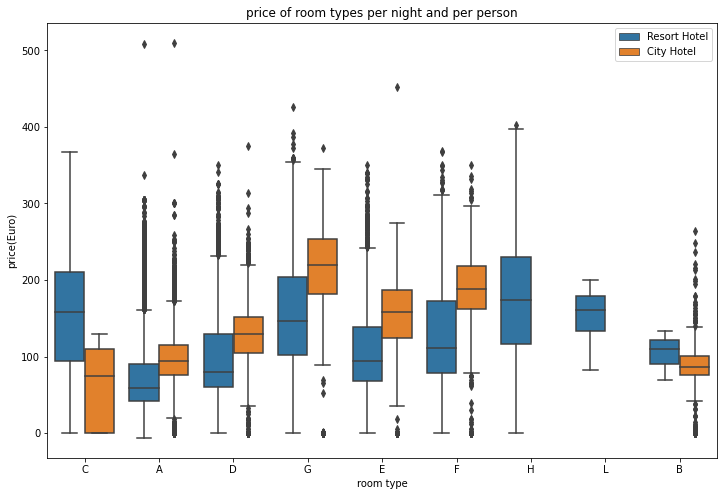

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel', data=hotel_type)
plt.title("price of room types per night and per person")
plt.xlabel('room type')
plt.ylabel('price(Euro)')
plt.legend()
plt.show()

In [79]:
# how does the price per night vary over the year



In [80]:
hotel.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [81]:
resort_hotel=hotel[(hotel['hotel']=='Resort Hotel') & (hotel['is_canceled']==0)]
city_hotel=hotel[(hotel['hotel']=='City Hotel') & (hotel['is_canceled']==0)]

In [99]:
resort_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [100]:
#group by arrival date month and price
#to make it a df, reset index

resort_hoteldf = resort_hotel.groupby(['arrival_date_month'])['adr'].mean().reset_index()


In [101]:
resort_hoteldf

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [102]:
city_hoteldf = city_hotel.groupby(['arrival_date_month'])['adr'].mean().reset_index()


In [103]:
city_hoteldf

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [104]:
#merge the two dataframes

final = resort_hoteldf.merge(city_hoteldf, on='arrival_date_month')
final.columns = ['months','price_for_resort','price_for_city']

In [105]:
final

,months,price_for_resort,price_for_city
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [106]:
#sort the months using 

!pip install sorted-months-weekdays

In [107]:
!pip install sort-dataframeby-monthorweek

In [108]:
import sort_dataframeby_monthorweek as sd

In [109]:
def sort_data(df,colname):
    return sd.Sort_Dataframeby_Month(df,colname)
    

In [110]:
final = sort_data(final,'months')
final

,months,price_for_resort,price_for_city
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [111]:
#visuals.
#line plot

px.line(final,x='months',y=['price_for_resort', 'price_for_city'],
       title='room price overnight per month')

In [112]:
final.columns

Index(['months', 'price_for_resort', 'price_for_city'], dtype='object')

In [115]:
#analysis demands of hotels



In [116]:
rush_resort = resort_hotel['arrival_date_month'].value_counts().reset_index()
rush_resort.columns = ['months','no.of guests']
rush_resort

,months,no.of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [117]:
rush_city = city_hotel['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['months','no.of guests']
rush_city

,months,no.of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [118]:
#merge dataframes

final_rush = rush_resort.merge(rush_city,on='months')
final_rush.columns = ['months','no of guests in resort','no of guest in city']
final_rush

,months,no of guests in resort,no of guest in city
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [119]:
#hierachy of my months
final_rush = sort_data(final_rush,'months')
final_rush

,months,no of guests in resort,no of guest in city
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [120]:
#we need trend, so we go for line plot

px.line(final_rush,x='months',y= ['no of guests in resort', 'no of guest in city'],
       title='total no of guest per months')

# machine learning


In [121]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [122]:
#find correlation
hotel.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.046529,-0.082995,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.012640,-0.086250,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.056463,0.033882,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.018244,-0.032750,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.000202,0.003724,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.161427,-0.079977,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.195135,-0.043641,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,0.024994,-0.166778,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.050581,-0.042622,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.030266,-0.009459,-0.010621,0.029186,0.037383,0.097889


In [123]:
#correlation with respet to is cancelled

co_relate = hotel.corr()['is_canceled']
co_relate

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005036
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.046529
company                          -0.082995
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [124]:
#finding the most important features

co_relate.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [125]:
#
hotel.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

In [126]:
#exclude unnecessary features

list_not = ['days_in_waiting_list ','arrival_date_year ']

In [127]:
#fetch numerical features we have
#using a list comprehension

num_features = [col for col in hotel.columns if hotel[col].dtype != 'object' and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [128]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [129]:
cat_not = ['arrival_date_year','country','assigned_room_type','booking_changes', 'reservation_status','days_in_waiting_list']

In [130]:
cat_features = [col for col in hotel.columns if hotel[col].dtype == 'object' and col not in cat_not]

In [131]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [132]:
#extracting derived features 





In [133]:
cat_data = hotel[cat_features]

In [134]:
cat_data.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [135]:
#when you want to block the warning
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [136]:
cat_data['reservation_status_date'] = pd.to_datetime(cat_data['reservation_status_date'])

In [137]:
#creating different columns for month day and year

cat_data['year'] = cat_data['reservation_status_date'].dt.year
cat_data['month'] = cat_data['reservation_status_date'].dt.month
cat_data['day'] = cat_data['reservation_status_date'].dt.day



In [138]:
#drop the column with the combination of the data

cat_data.drop('reservation_status_date', axis =1, inplace=True)

In [139]:
cat_data.dtypes

hotel                   object
arrival_date_month      object
meal                    object
market_segment          object
distribution_channel    object
reserved_room_type      object
deposit_type            object
customer_type           object
year                     int64
month                    int64
day                      int64
dtype: object

In [140]:
cat_data['cancellation']=hotel['is_canceled']

In [141]:
cat_data.dtypes

hotel                   object
arrival_date_month      object
meal                    object
market_segment          object
distribution_channel    object
reserved_room_type      object
deposit_type            object
customer_type           object
year                     int64
month                    int64
day                      int64
cancellation             int64
dtype: object

In [142]:
#applying feature encoding
cat_data.head()



,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


In [143]:
##mean encoding technique

cat_data['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [144]:
col_enc = cat_data.columns[0:8]

In [145]:
for col in col_enc:
    print(cat_data.groupby([col])['cancellation'].mean().to_dict())
    print('\n')

{'City Hotel': 0.41726963317786464, 'Resort Hotel': 0.27763354967548676}


{'April': 0.4079718640093787, 'August': 0.3775311666786769, 'December': 0.3497050147492625, 'February': 0.3341596430342092, 'January': 0.3047731489289931, 'July': 0.37453597662112, 'June': 0.4145717158789652, 'March': 0.3215233816622422, 'May': 0.39665846832329743, 'November': 0.3123344127171033, 'October': 0.3804659498207885, 'September': 0.3917015607156452}


{'BB': 0.3738489871086556, 'FB': 0.5989974937343359, 'HB': 0.3446034709258107, 'SC': 0.3723943661971831, 'Undefined': 0.2446535500427716}


{'Aviation': 0.21940928270042195, 'Complementary': 0.13055181695827725, 'Corporate': 0.1873465533522191, 'Direct': 0.15341900682214818, 'Groups': 0.6106203624249155, 'Offline TA/TO': 0.34316032866757507, 'Online TA': 0.3672114312020823, 'Undefined': 1.0}


{'Corporate': 0.22075782537067545, 'Direct': 0.17459883919426425, 'GDS': 0.19170984455958548, 'TA/TO': 0.41025850618166954, 'Undefined': 0.8}


{'A': 0.391073795846

In [146]:
for col in col_enc:
    dict = cat_data.groupby([col])['cancellation'].mean().to_dict()
    cat_data[col] = cat_data[col].map(dict)

In [147]:
cat_data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0
1,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0
2,0.277634,0.374536,0.373849,0.153419,0.174599,0.391074,0.28377,0.407463,2015,7,2,0
3,0.277634,0.374536,0.373849,0.187347,0.220758,0.391074,0.28377,0.407463,2015,7,2,0
4,0.277634,0.374536,0.373849,0.367211,0.410259,0.391074,0.28377,0.407463,2015,7,3,0


In [148]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [149]:
entire_df = pd.concat([cat_data,hotel[num_features]], axis=1)

In [150]:
entire_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.0,0,0
1,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.0,0,0
2,0.277634,0.374536,0.373849,0.153419,0.174599,0.391074,0.28377,0.407463,2015,7,2,0,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.0,0,0
3,0.277634,0.374536,0.373849,0.187347,0.220758,0.391074,0.28377,0.407463,2015,7,2,0,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.0,0,0
4,0.277634,0.374536,0.373849,0.367211,0.410259,0.391074,0.28377,0.407463,2015,7,3,0,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.0,0,1


In [151]:
#
entire_df.drop('cancellation', axis=1, inplace=True)

In [152]:
entire_df.shape

(119390, 31)

In [153]:
#handling outliers

entire_df.head()


,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.0,0,0
1,0.277634,0.374536,0.373849,0.153419,0.174599,0.330472,0.28377,0.407463,2015,7,1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.0,0,0
2,0.277634,0.374536,0.373849,0.153419,0.174599,0.391074,0.28377,0.407463,2015,7,2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.0,0,0
3,0.277634,0.374536,0.373849,0.187347,0.220758,0.391074,0.28377,0.407463,2015,7,2,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.0,0,0
4,0.277634,0.374536,0.373849,0.367211,0.410259,0.391074,0.28377,0.407463,2015,7,3,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.0,0,1


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

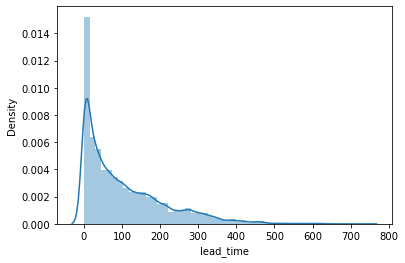

In [154]:
#distribution of lead time

sns.distplot(entire_df['lead_time'])

In [155]:
#find the log of these 

def handle_outlier(col):
    entire_df[col] = np.log1p(entire_df[col])


In [156]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

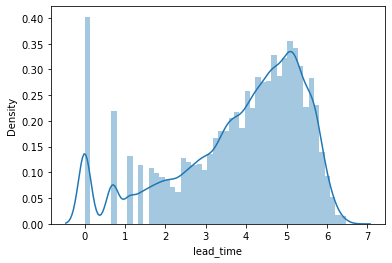

In [157]:
sns.distplot(entire_df['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

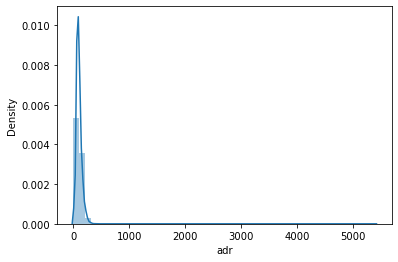

In [158]:
sns.distplot(entire_df['adr'])

In [159]:
handle_outlier('adr')

<AxesSubplot:xlabel='adr', ylabel='Density'>

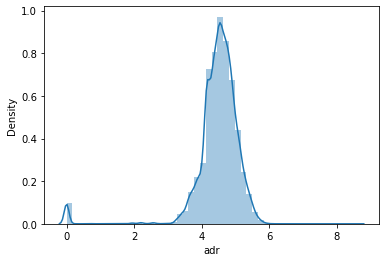

In [160]:
sns.distplot(entire_df['adr'].dropna())

<AxesSubplot:xlabel='adr', ylabel='Density'>

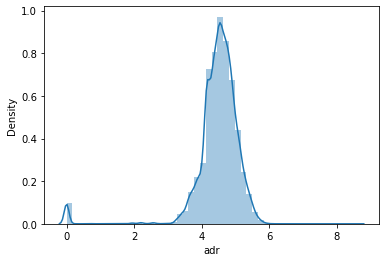

In [161]:
sns.distplot(entire_df['adr'])

In [162]:
#applying feature importance
#most important features

entire_df.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list        

In [163]:
entire_df.dropna(inplace=True)

In [164]:
#dependent and independent feature

#dependent feature
y = entire_df['is_canceled']

#independent features
x=entire_df.drop('is_canceled',axis=1)

In [165]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [166]:
feature_selmodel = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [167]:
feature_selmodel.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [168]:

feature_selmodel.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True])

In [169]:
cols = x.columns

In [170]:
selected_feat = cols[feature_selmodel.get_support()]

In [171]:
print('total features {}'. format(x.shape[1]))
print('selected features {}'.format (len(selected_feat)))

total features 30
selected features 19


In [172]:
x = x[selected_feat]

# logistic regression

In [173]:
#applying machine learning
#cross validation of data


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [188]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [189]:
logreg = LogisticRegression()

In [190]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [191]:
y_pred = logreg.predict(X_test)

In [192]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [184]:
from sklearn.metrics import confusion_matrix

In [185]:
confusion_matrix(y_test, y_pred)

array([[15450,  3292],
       [ 5181,  5925]], dtype=int64)

In [193]:
from sklearn.metrics import accuracy_score

In [194]:
accuracy_score(y_test,y_pred)

0.7235995711605467

In [195]:
from sklearn.model_selection import cross_val_score

In [196]:
score = cross_val_score(logreg, x, y, cv=10)

In [197]:
score.mean()

0.6832624512461718

# applying various algorithmn on this data.

In [199]:
#importing the models from sklearn

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [200]:
#initializing the model

models = []

models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive bayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision tree ',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))



In [201]:
#fit the models

for name,model in models:
    print(name)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))
    print('\n')
    
    print(accuracy_score(predictions, y_test))
    print('\n')

LogisticRegression
[[16661  6204]
 [ 2046  4937]]


0.7235995711605467


Naive bayes
[[ 7091   767]
 [11616 10374]]


0.5851313320825516


RandomForest
[[18647   997]
 [   60 10144]]


0.9645872420262664


Decision tree 
[[18188   591]
 [  519 10550]]


0.9628115786652373


KNN
[[18640   901]
 [   67 10240]]


0.9675690163495042


